# <center> <u> State Fragility Analysis </u> </center>

# <u>  Intro - Simple Linear Regression</u>

For this project I wanted to practice my statistics and machine learning (ML) skills using a dataset that attempts to measure state fragility. The dataset is the Fragile States Index (FSI) and it comes from an organization called the Fund for Peace (FFP).

To get started, get an idea of what is meant by "state fragility" by exploring the [FFP website](https://fragilestatesindex.org).

<b>  Import the 2020 FSI dataset as a .csv showing first five rows</b> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('fsi-2020.csv')
data.head()

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Yemen,2020.0,1st,112.4,9.7,10.0,9.7,9.4,7.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Somalia,2020.0,2nd,110.9,9.8,10.0,8.6,9.1,9.4,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South Sudan,2020.0,3rd,110.8,9.4,9.7,9.1,9.5,9.2,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Syria,2020.0,4th,110.7,9.9,9.9,10.0,8.7,7.2,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Congo Democratic Republic,2020.0,5th,109.4,8.5,9.8,9.7,8.0,8.6,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> I want to rename the following columns as follows (to hone in on analysis to come) and show the first five
rows of the revised dataset:</b>

- 'Total': 'total'
- 'C3: Group grievance': 'grievance'  
- 'E1: Economy': 'economy'

In [2]:
data.rename(columns={'Total':'total', 'C3: Group Grievance':'grievance', 'E1: Economy':'economy'}, inplace=True)
data.head()

,Country,Year,Rank,total,C1: Security Apparatus,C2: Factionalized Elites,grievance,economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,Yemen,2020.0,1st,112.4,9.7,10.0,9.7,9.4,7.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Somalia,2020.0,2nd,110.9,9.8,10.0,8.6,9.1,9.4,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,South Sudan,2020.0,3rd,110.8,9.4,9.7,9.1,9.5,9.2,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Syria,2020.0,4th,110.7,9.9,9.9,10.0,8.7,7.2,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Congo Democratic Republic,2020.0,5th,109.4,8.5,9.8,9.7,8.0,8.6,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<b> I am generating correlation matrix for all numeric variables in order to determine the relationship between `total` and `economy` in as much detail as possible </b>

In [3]:
data.corr()

,Year,total,C1: Security Apparatus,C2: Factionalized Elites,grievance,economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total,NaN,1.000000,0.887235,0.874824,0.672844,0.858640,0.866375,0.779229,0.856386,0.904305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1: Security Apparatus,NaN,0.887235,1.000000,0.763891,0.639008,0.722027,0.726362,0.654997,0.741490,0.788521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C2: Factionalized Elites,NaN,0.874824,0.763891,1.000000,0.701070,0.676499,0.674551,0.582870,0.867353,0.669747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
grievance,NaN,0.672844,0.639008,0.701070,1.000000,0.416940,0.438757,0.382594,0.606273,0.454082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economy,NaN,0.858640,0.722027,0.676499,0.416940,1.000000,0.766896,0.759251,0.657170,0.836088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E2: Economic Inequality,NaN,0.866375,0.726362,0.674551,0.438757,0.766896,1.000000,0.711890,0.685432,0.890084,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E3: Human Flight and Brain Drain,NaN,0.779229,0.654997,0.582870,0.382594,0.759251,0.711890,1.000000,0.529059,0.765505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P1: State Legitimacy,NaN,0.856386,0.741490,0.867353,0.606273,0.657170,0.685432,0.529059,1.000000,0.671254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P2: Public Services,NaN,0.904305,0.788521,0.669747,0.454082,0.836088,0.890084,0.765505,0.671254,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The correlation coefficient between total and economy is 0.86, which is a fairly strong positive correlation.

<b> Below is a scatterplot between `total` and `economy`, where `total` is on the y-axis. Followed by an analysis of the relatonship</b>

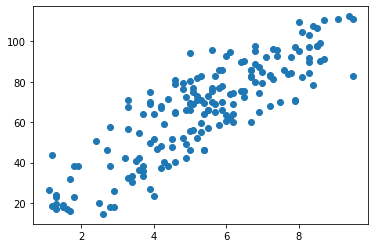

In [4]:
plt.scatter(data['economy'], data['total'])
plt.show()

The relationship between total and economy is positive and (mostly) linear.

<b> Next, alternative and null hypotheses for a two-tailed test  </b>

H0: There is no relationship between the economy score and total state fragility score. <br>
H1: There is a relationship between the economy score and total state fragility score.

<b> Now, a simple OLS regression with the model from earlier using the statistical approach and present a table of the results </b>

In [5]:
import statsmodels.api as sm                    
import statsmodels.formula.api as smf

results = smf.ols('total ~ economy', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     493.9
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           5.78e-53
Time:                        18:53:00   Log-Likelihood:                -700.33
No. Observations:                 178   AIC:                             1405.
Df Residuals:                     176   BIC:                             1411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9461      2.644      4.140      0.000       5.728      16.165
economy       10.2673      0.462     22.223      0.000       9.355      11.179
==============================================================================
Omnibus:                        4.871   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                2.826
Skew:                           0.047   Prob(JB):                        0.243
Kurtosis:                       2.390   Cond. No.                         16.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>interpretation of the intercept</b>

When the economy score is 0, the state fragility index score is 10.9.

<b>interpretation of the coefficient on `economy`</b>

A one-point increase in the economy score is associated with a 10.3-point increase in the state fragility score.

<b>interpretation of the p-value for `economy`</b>

The p-value for the coefficient on the economy score is 0.000, which means the coefficient is <b> statistically significant</b> at the p<0.01 level. Thus, we reject the null hypothesis stated above.

<b>interpretation of the confidence interval for `economy`</b>

If we did many trials of this study, 95% of the time our confidence interval would contain the true value. In this case, the confidence interval for the coefficent on the economy score is between 9.4 and 11.2. It does not contain zero, which also tells us the coefficient is <b> statistically significant </b> at the p<0.05 level.

<b>interpretation of R-squared</b>

Our model explains 73.7% of the variation in the state fragility scores.

# <u>  Multiple Regression with OLS</u>

<b> Below, a multiple regression using OLS. I am adding the variable `grievance` as a second independent variable, stating the null and alternative hypotheses for this new variable for a two-tailed test </b>

H0: There is no relationship between the grievance score and state fragility score,<b> holding the economic score constant</b>. <br>H1: There is a relationship between the grievance score and fragility score, <b> holding the economic score constant</b>.

<b>Table of the results</b>

In [6]:
results = smf.ols('total ~ economy + grievance', data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     525.4
Date:                Mon, 15 Nov 2021   Prob (F-statistic):           1.06e-74
Time:                        18:53:00   Log-Likelihood:                -646.04
No. Observations:                 178   AIC:                             1298.
Df Residuals:                     175   BIC:                             1308.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.1810      2.234     -0.976      0.330      -6.591       2.229
economy        8.3673      0.376     22.269      0.000       7.626       9.109
grievance      3.9979      0.330     12.128      0.000       3.347       4.649
==============================================================================
Omnibus:                        4.054   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                3.340
Skew:                          -0.231   Prob(JB):                        0.188
Kurtosis:                       2.513   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b>interpretation of the coefficient on `grievance`</b>

A one-point increase in the grievance score is associated with a 4.0-point increase in the state fragility score, <b> holding the economy score constant. </b>

<b> Comparison to simple linear regression earlier </b>

Yes there is an improvement. The adjusted R-squared for this model is 0.86 which is higher than the R-squared of 0.74 in the simple linear regression, so from this perspective it's an improved model in terms of explanatory power. 

<b> Reject or fail to reject the null hypothesis for new variable? </b>

We reject the null at the p<0.01 level based on the p-value for the grievance score, which is 0.000. We can also see that the 95% confidence interval for grievance does not contain zero, which also tells us that the coefficient is significant at the p<0.05 level, and thus we can reject the null for that reason as well.

# <u>  Multiple Linear Regression with ML</u>

<b>First, set up your X and y arrays using the variable names in your setup syntax</b>

In [7]:
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression       
from sklearn import metrics

data=data.dropna(subset = ['total', 'grievance', 'economy'])
x = data[['economy', 'grievance']].values.reshape(-1,2)         
y = data['total'].values.reshape(-1,1)

<b>Divide X and y into training and test sets, making the test set 25% of your data, and set the `random_state` to 4 </b>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=4)

<b>  Train the algorithm </b>

In [9]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

<b>Print the intercept and coefficients with interpretation</b>

In [10]:
print('Intercept', regressor.intercept_)        
print('Coefficient', regressor.coef_)

Intercept [-1.85049884]
Coefficient [[8.22711219 4.02417692]]


- The intercept is -1.9, which means the fragility score is -1.9 when both the economy and grievance scores are zero.
- The coefficient on the economy score is 8.2, which means a one-point increase in the economy score is associated with a 8.2-point increase in the fragility score, holding the grievance score constant.
- The coefficient on the grievance score is 4.0, which means a one-point increase in the grievance score is associated with a 4.0-point increase in the fragility score, holding the economy score constant.

<b> Table of the first 10 values of your actual vs. predicted values</b>

In [11]:
y_pred = regressor.predict(x_test)
compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
compare.head(10)

,Actual,Predicted
0,24.1,25.746290
1,42.4,56.973565
2,97.2,103.456960
3,83.0,86.367509
4,70.8,55.882716
5,32.3,36.566667
6,91.7,87.762670
7,73.0,70.306976
8,110.9,107.624144
9,72.5,63.295843


We did pretty well! Most predicted values are within a few points from the actual values. That said, a few are quite a bit off (e.g., 70.8 actual vs. 55.9 predicted).

<b>R-squared with interpretation </b>

In [12]:
print('R-squared', metrics.r2_score(y_test, y_pred))

R-squared 0.8990089747397227


The R-squared is 0.899, which means our model explains 89.9% of the variance in the dependent variable, the state fragility score. 

<b> When we have more than one independent variable, we use the adjusted R-squared instead </b>

In [13]:
r_squared = metrics.r2_score(y_test, y_pred)
adj_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
adj_r_squared

0.897854791593891

The Adj. R-squared is 0.898, which means that, penalizing for adding independent variables, our model explains 89.8% of the variance in state fragility scores.

<b> (h) Comparison of overall ML output with statistical approach to multiple OLS in Question 2</b>

The ML and statistical approaches to OLS give us very similar results! The intercepts and the coefficients on both IVs in the statistical output and ML results are quite similar. The R-squared and Adj. R-squared are a bit lower in the statistical output than the ML results. But overall the results are very similar.

<b> Re-run the ML regression analysis, but this time with the test set as 90% of your data (keep the `random_state` the same)</b>

This new version with a small training set and large test set is less accurate. I am concluding this based on the fact that there are more errors between the actual and predicted values, as well as a lower Adj. R-squared. This is because we're training on only a small part of the data so the model can't "learn" as much about the relationship between the variables.

# <u>  K-Nearest Neighbor</u>

<b>To conduct a k-NN classification I need a categorical dependent variable. Create a new column called `total_cat` that takes the value "fragile" if the `total` score is greater than the median for `total`, and the value "stable" if the `total` score is less than or equal to the median for `total`

In [14]:
from sklearn.model_selection import train_test_split                                     
from sklearn.preprocessing import StandardScaler                     
from sklearn.neighbors import KNeighborsClassifier                   
from sklearn.metrics import classification_report, confusion_matrix  

#any code to find the median is fine, and you don't need to show it for full credit.

def categories(x):
        if x < 69.25:
            return 'stable' 
        else:
            return 'fragile'

total_cat = []
for i in data['total']:
    total_cat.append(categories(i))
data['total_cat'] = total_cat
data.head()

<ipython-input-14-20eceaeb54a9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_cat'] = total_cat


,Country,Year,Rank,total,C1: Security Apparatus,C2: Factionalized Elites,grievance,economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,total_cat
0,Yemen,2020.0,1st,112.4,9.7,10.0,9.7,9.4,7.8,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fragile
1,Somalia,2020.0,2nd,110.9,9.8,10.0,8.6,9.1,9.4,8.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fragile
2,South Sudan,2020.0,3rd,110.8,9.4,9.7,9.1,9.5,9.2,6.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fragile
3,Syria,2020.0,4th,110.7,9.9,9.9,10.0,8.7,7.2,8.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fragile
4,Congo Democratic Republic,2020.0,5th,109.4,8.5,9.8,9.7,8.0,8.6,6.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fragile


<b> X and y arrays using the .iloc syntax in the setup

In [15]:
x = data.iloc[:, [6,7]].values.reshape(-1, 2)          
y = data.iloc[:, -1].values.reshape(-1, 1)

<b> Divide your X and y into training and test sets, making the test set 25% of your data and set the `random_state` to 4</b>

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

<b> Train your algorithm</b>

In [17]:
scaler = StandardScaler()                            
scaler.fit(x_train)
x_train = scaler.transform(x_train)     
x_test = scaler.transform(x_test)

classifier = KNeighborsClassifier(n_neighbors=5)                      
classifier.fit(x_train, y_train.flatten())

KNeighborsClassifier()

<b>Table of the first 10 actual vs. predicted values with interpretation</b>

In [18]:
y_pred = classifier.predict(x_test)
compare = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})   
compare.head(10)

,Actual,Predicted
0,stable,stable
1,stable,stable
2,fragile,fragile
3,fragile,fragile
4,fragile,stable
5,stable,stable
6,fragile,fragile
7,fragile,fragile
8,fragile,fragile
9,fragile,stable


We did pretty well! We got 8 correct out of these first 10.

<b>Confusion matrix and classification report with interpretation</b>

In [19]:
print(confusion_matrix(y_test, y_pred))              
print(classification_report(y_test, y_pred))

[[18  3]
 [ 5 19]]
              precision    recall  f1-score   support

     fragile       0.78      0.86      0.82        21
      stable       0.86      0.79      0.83        24

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.83      0.82      0.82        45



We correctly identified 18 as stable and 19 as fragile. We called 5 stable when they were fragile, and we called 3 fragile when they were stable.

<b>A plot of the mean error of the model for different values of k between 1 and 50 </b>

Text(0, 0.5, 'mean error')

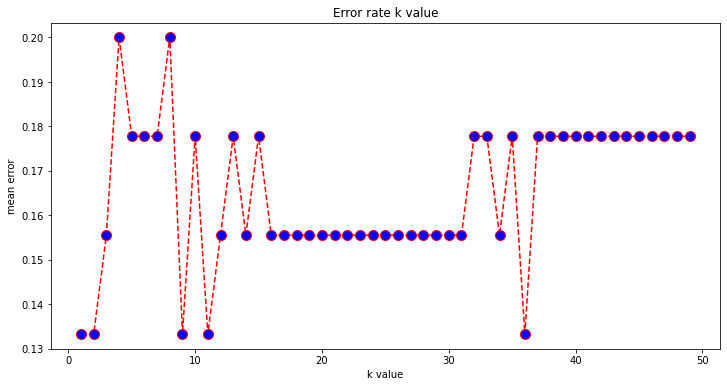

In [20]:
error = []
for i in range(1, 50):                             
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train.flatten())    
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i.reshape(-1,1) != y_test.reshape(-1,1)))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error rate k value')
plt.xlabel('k value')
plt.ylabel('mean error')

<b> Interpretation</b>

Very generally, the error goes down as k increases, though it bounces around a lot. It converges to about 15.5 between k values of 15-30 or so, and then increases slightly to 18 and converges there beginning when k is about 38 and higher.

# <u>  Comparison between all 4 models</u>

<b> How confident I feel explaining state fragility with these two independent variables?

Leaving out concerns about endogeneity and other challenges to inference, the models themselves all seem to perform reasonably well: we reject the null hypothesis in all cases, and the R-squared and Adj. R-squareds are all quite high.

<b>Risk of endogeneity in our research?</b>

Yes. It's reasonable to believe that having a strong economy could make a country more stable, and that being more stable could cause a country to have a stronger economy. For example, political stability could be more attractive to foriegn investors, leading to more economic growth. Thus, it's difficult to say for sure whether we're picking up a causal relationship where the economy is driving stability, or it's really the other way around.<br>

The same goes for our second independent variable. Having fewer grievances could cause a country to be more stable, but having a stable country could also cause fewer grievances. For example, political stability could lead to fewer contentious political conflicts that cause grievances. Again, we can't say from our work so far whether it's really grievances driving stability, or it's really the other way around.

<b>Risk of confounders?</b>

Yes. Some common underlying factor could likely be influencing both the economy and stability. For example, a country with many natural resources or robust industries could drive both high economic performance and stability. The same goes for grievances. For example, an uneven distribution of wealth could plausibly influence both grievances and stability.

<b>Confidence on variables I've worked with description in terms of conceptualization and operationalization </b>


I'm only somewhat confident. While the variables seem thorough -- they include many elements related to each variable, the methodology is not particularly well-described, so it's difficult to assess how reliable the measures are. For example, for the "economy" variable, which is "E1: Economic Decline and Poverty" is mostly simply conceputalized as just "factors related to economic decline in a country". It goes on to describe some specific components within that conceptualization, but then offers no specific information about how it is operationalized, i.e., actually measured. 

The opening portion of the codebook discusses that there are many inputs, including "content analysis", "quantitative data", and "qualitative review", but there's really not enough information to understand exactly what went into each number we are using. While I'm sure the researchers put in a good effort, I am not convinced about the quality of the measurement largely because there's not a lot of detail, especially regarding operationalization.

<b>Possible ways to improve research on this topic?

I would want to explore each independent variable in a lot more detail to hopefully better illuminate likely causal mechanisms. For example, the "economy" variable captures many aspects of a country's economy. I would want to split up the inputs to that index into their own variables and examine the impact of each component on fragility. For example, what typically matters more: commodity prices? trade? business performance? We can't say much currently about what *about* the economy matters for fragility. 